In [50]:
import folium
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import json
import googlemaps
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import platform
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system. sorry~~~')

import pandas_datareader.data as web
from fbprophet import Prophet
from datetime import datetime
from pandas_datareader import data

In [51]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image
import nltk
from konlpy.corpus import kobill

# 1.kor 2012_2014의 주요 키워드 시각화

In [52]:
doc_ko = pd.read_csv('../data/kor2012_2014.txt')

In [53]:
doc_ko_tot = ''
for i in doc_ko['국문키워드']:
    doc_ko_tot = doc_ko_tot + ';' +i

In [54]:
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.nouns(doc_ko_tot)

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [55]:
ko = nltk.Text(tokens_ko, name = '국문키워드')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

1193
928


FreqDist({'로봇': 8, '해양': 7, '증후군': 7, '과학': 6, '실험': 6, '인공': 6, '은행': 6, '우주': 5, '스마트': 5, '시스템': 5, ...})

# 1) 워드 크라우드로 표현

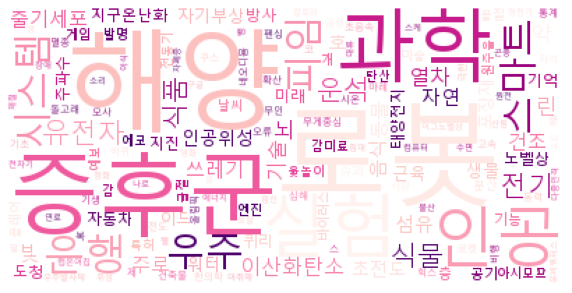

In [56]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                     relative_scaling = 0.3,
                     background_color = 'white',
                     colormap = 'RdPu').generate_from_frequencies(dict(data))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 2)빈도수 표현

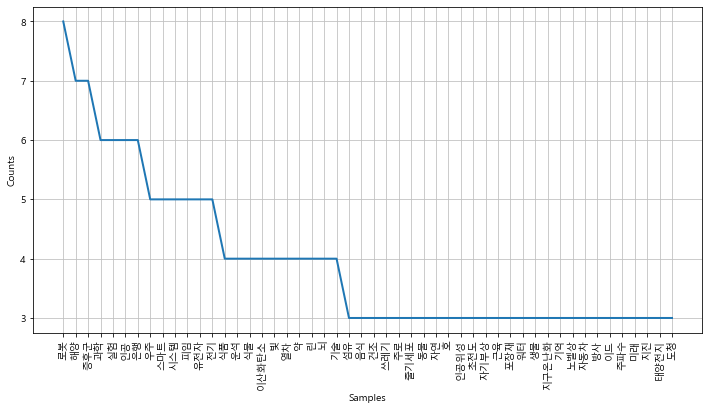

In [57]:
plt.figure(figsize = (12,6))
ko.plot(50)
plt.show()

# 2. 영문 키워드 분석

In [71]:
text = open('../data/eng_keyw.txt').read()
earth_mask = np.array(Image.open('../data/earth.png'))
stopwords = set(STOPWORDS)
wc = WordCloud( max_words=3000,stopwords= stopwords,mask = earth_mask,
               background_color = 'white',
               colormap = "Greens").generate(text)
wc.words_

{'water': 1.0,
 'syndrome': 0.8333333333333334,
 'air': 0.6666666666666666,
 'power': 0.6666666666666666,
 'tap': 0.5,
 'frequency': 0.5,
 'light': 0.5,
 'communication': 0.5,
 'robot': 0.5,
 'sodium': 0.5,
 'earthquake': 0.5,
 'Curie': 0.5,
 'fiber': 0.5,
 'solar': 0.5,
 'filter': 0.5,
 'network': 0.5,
 'electric': 0.5,
 'electromagnetic': 0.5,
 'magnetic': 0.5,
 'wind': 0.5,
 '3D': 0.5,
 'wave': 0.5,
 'carbon dioxide': 0.5,
 'nobel prize': 0.5,
 'wireless': 0.3333333333333333,
 'internet': 0.3333333333333333,
 'estrogen': 0.3333333333333333,
 'cortisol': 0.3333333333333333,
 'google': 0.3333333333333333,
 'system': 0.3333333333333333,
 'speed': 0.3333333333333333,
 'blues': 0.3333333333333333,
 'new': 0.3333333333333333,
 'insect': 0.3333333333333333,
 'hacking': 0.3333333333333333,
 'infinite': 0.3333333333333333,
 'gravity': 0.3333333333333333,
 'mosquito': 0.3333333333333333,
 'James': 0.3333333333333333,
 'Cook': 0.3333333333333333,
 'battery': 0.3333333333333333,
 'chip': 0.3333

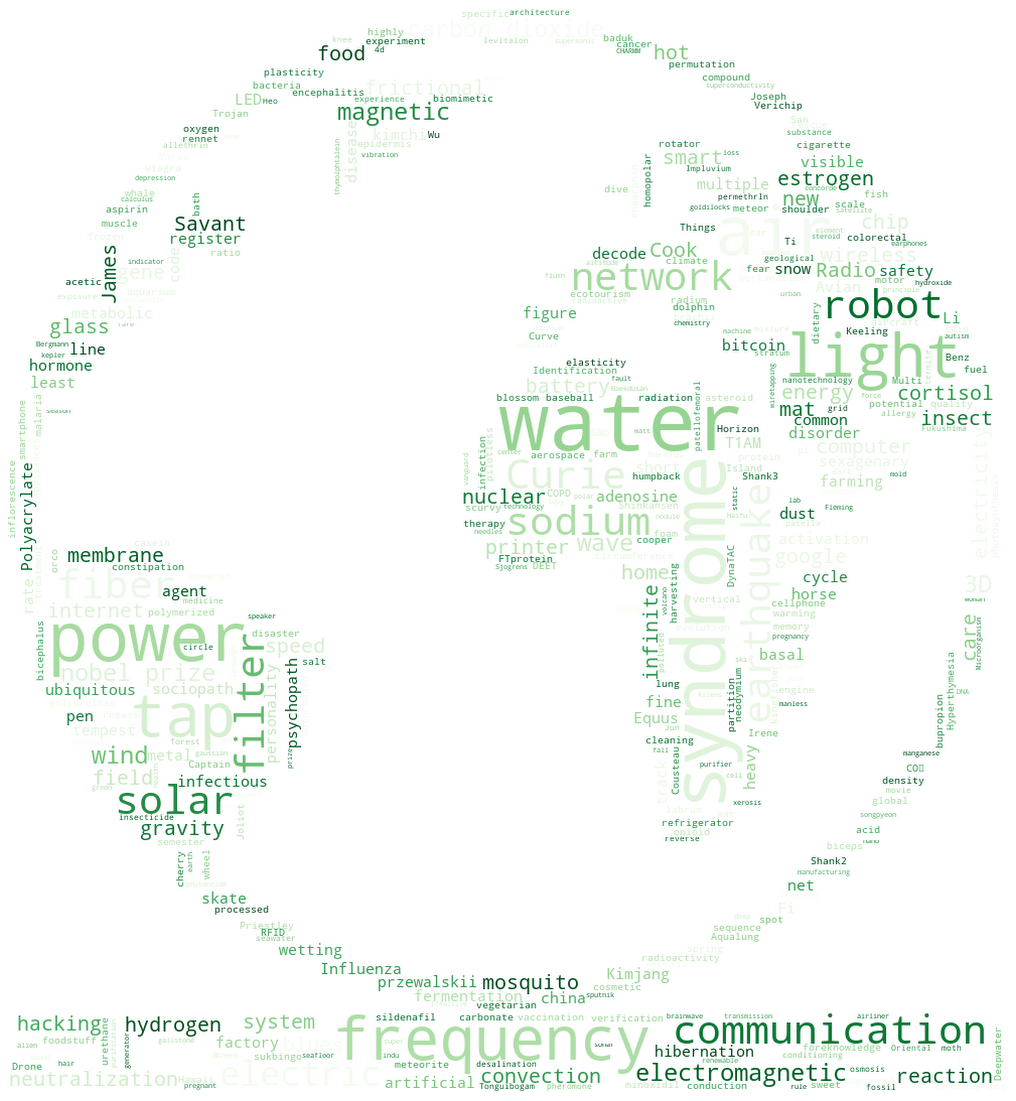

In [59]:
plt.figure(figsize = (20,20))
plt.imshow(wc, interpolation='lanczos')
plt.axis('off')
plt.show()